<a href="https://www.kaggle.com/code/yildirimalican/marine-fish-dataset-eda?scriptVersionId=211945587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/marine-fish-dataset/Marine_Fish_Data.csv")

In [3]:
df.head().style.set_properties(**{'background-color':'red',
                                  'color':'white'})

,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
0,Salmon,North Atlantic,Summer,Net,8270,71.920000,No,24.680000,High
1,Tuna,Pacific Ocean,Monsoon,Line,1860,85.330000,No,21.330000,High
2,Cod,Mediterranean Sea,Summer,Line,6390,88.020000,No,16.980000,Medium
3,Herring,Pacific Ocean,Monsoon,Trawl,6191,85.460000,Yes,28.510000,Low
4,Herring,Indian Ocean,Monsoon,Trawl,6734,48.350000,Yes,25.370000,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species_Name           500 non-null    object 
 1   Region                 500 non-null    object 
 2   Breeding_Season        500 non-null    object 
 3   Fishing_Method         500 non-null    object 
 4   Fish_Population        500 non-null    int64  
 5   Average_Size(cm)       500 non-null    float64
 6   Overfishing_Risk       500 non-null    object 
 7   Water_Temperature(C)   500 non-null    float64
 8   Water_Pollution_Level  500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


In [5]:
df.isnull().sum()

Species_Name             0
Region                   0
Breeding_Season          0
Fishing_Method           0
Fish_Population          0
Average_Size(cm)         0
Overfishing_Risk         0
Water_Temperature(C)     0
Water_Pollution_Level    0
dtype: int64

In [6]:
df.isna().sum().sum()

0

In [7]:
df.shape

(500, 9)

In [8]:
pd.DataFrame(df.columns,columns=['column name']).style.set_properties(**{'background-color':'red',
                                  'color':'white'})

,column name
0,Species_Name
1,Region
2,Breeding_Season
3,Fishing_Method
4,Fish_Population
5,Average_Size(cm)
6,Overfishing_Risk
7,Water_Temperature(C)
8,Water_Pollution_Level


In [9]:
df.columns

Index(['Species_Name', 'Region', 'Breeding_Season', 'Fishing_Method',
       'Fish_Population', 'Average_Size(cm)', 'Overfishing_Risk',
       'Water_Temperature(C)', 'Water_Pollution_Level'],
      dtype='object')

In [10]:
df.describe()

,Fish_Population,Average_Size(cm),Water_Temperature(C)
count,500.000000,500.000000,500.000000
mean,5628.790000,56.022960,22.552300
std,2541.521134,24.962762,4.359735
min,1004.000000,10.230000,15.000000
25%,3499.250000,35.130000,18.790000
50%,5813.000000,57.520000,22.785000
75%,7877.750000,77.462500,26.182500
max,9996.000000,99.790000,29.990000


In [11]:
pd.DataFrame(df[['Species_Name', 'Region', 'Breeding_Season', 'Fishing_Method',
       'Fish_Population', 'Average_Size(cm)', 'Overfishing_Risk',
       'Water_Temperature(C)', 'Water_Pollution_Level']])

,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
0,Salmon,North Atlantic,Summer,Net,8270,71.92,No,24.68,High
1,Tuna,Pacific Ocean,Monsoon,Line,1860,85.33,No,21.33,High
2,Cod,Mediterranean Sea,Summer,Line,6390,88.02,No,16.98,Medium
3,Herring,Pacific Ocean,Monsoon,Trawl,6191,85.46,Yes,28.51,Low
4,Herring,Indian Ocean,Monsoon,Trawl,6734,48.35,Yes,25.37,Low
...,...,...,...,...,...,...,...,...,...
495,Salmon,Mediterranean Sea,Monsoon,Trawl,5330,56.12,No,25.29,High
496,Sardine,Pacific Ocean,Monsoon,Line,9010,76.75,No,15.26,Medium
497,Mackerel,Indian Ocean,Summer,Net,7801,72.90,No,19.85,Medium
498,Shark,North Atlantic,Monsoon,Net,5846,46.23,Yes,29.60,Medium


In [12]:
#Kategorik ve Sayısal Değişkenlerin Ayrılması
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kategorik Değişkenler:", categorical_columns)
print("Sayısal Değişkenler:", numerical_columns)

Kategorik Değişkenler: ['Species_Name', 'Region', 'Breeding_Season', 'Fishing_Method', 'Overfishing_Risk', 'Water_Pollution_Level']
Sayısal Değişkenler: ['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)']


In [13]:
# Eksik değerlerin sayısını kontrol et
missing_values = df.isnull().sum()
print(missing_values)

# Eksik değer yüzdesi
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Eksik değerleri doldurma (örneğin ortalama ile)
df['Average_Size(cm)'].fillna(df['Average_Size(cm)'].mean(), inplace=True)

# Eksik değerleri silme (tüm satırı veya sütunu)
df.dropna(inplace=True)

# Eksik değerlerin doldurulması sonrası kontrol
print(df.isnull().sum())


Species_Name             0
Region                   0
Breeding_Season          0
Fishing_Method           0
Fish_Population          0
Average_Size(cm)         0
Overfishing_Risk         0
Water_Temperature(C)     0
Water_Pollution_Level    0
dtype: int64
Species_Name             0.0
Region                   0.0
Breeding_Season          0.0
Fishing_Method           0.0
Fish_Population          0.0
Average_Size(cm)         0.0
Overfishing_Risk         0.0
Water_Temperature(C)     0.0
Water_Pollution_Level    0.0
dtype: float64
Species_Name             0
Region                   0
Breeding_Season          0
Fishing_Method           0
Fish_Population          0
Average_Size(cm)         0
Overfishing_Risk         0
Water_Temperature(C)     0
Water_Pollution_Level    0
dtype: int64


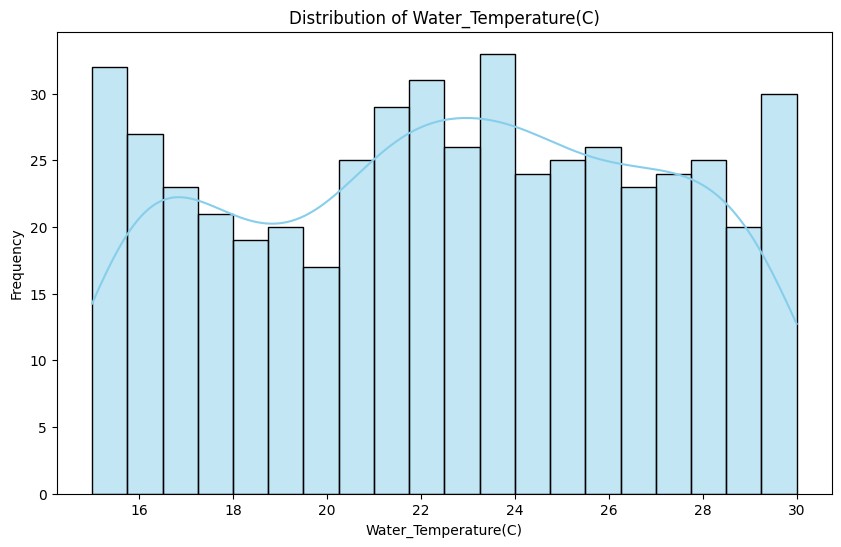

In [14]:
qualityRating = df['Water_Temperature(C)']

plt.figure(figsize=(10, 6))
sns.histplot(df['Water_Temperature(C)'], bins=20, kde=True, color='skyblue')

plt.xlabel('Water_Temperature(C)')
plt.ylabel('Frequency')
plt.title('Distribution of Water_Temperature(C)')

plt.show()

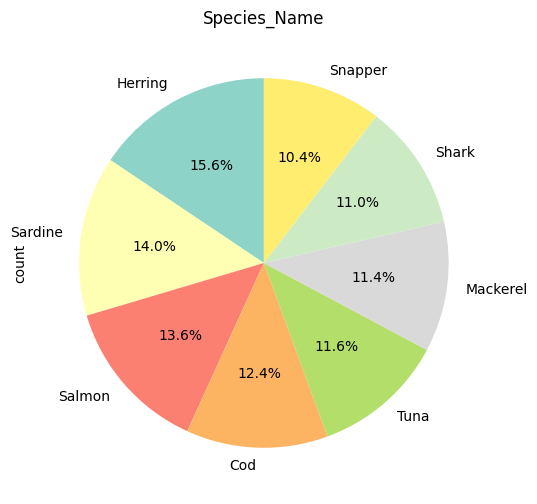

In [15]:
supplier_sizes = df['Species_Name'].value_counts()
supplier_sizes.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 6), cmap='Set3')
plt.title('Species_Name')
plt.show()

Fish_Population
Skew : -0.09


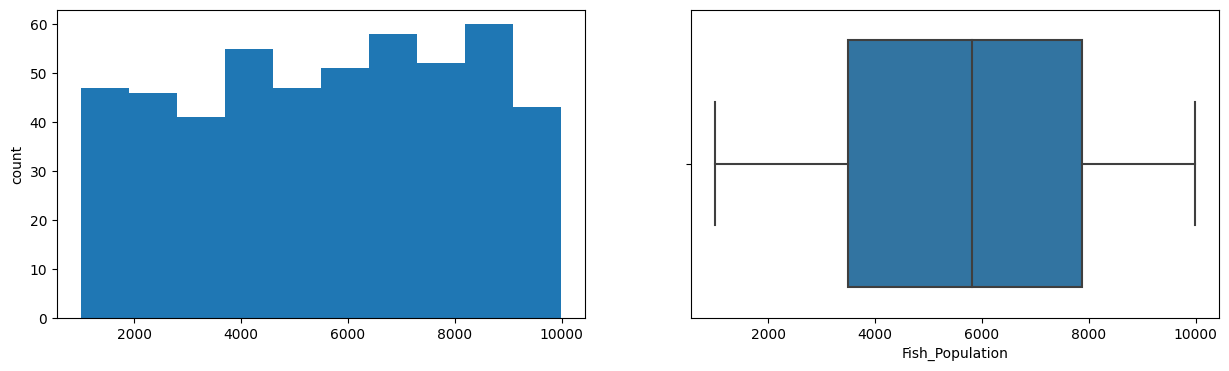

Average_Size(cm)
Skew : -0.07


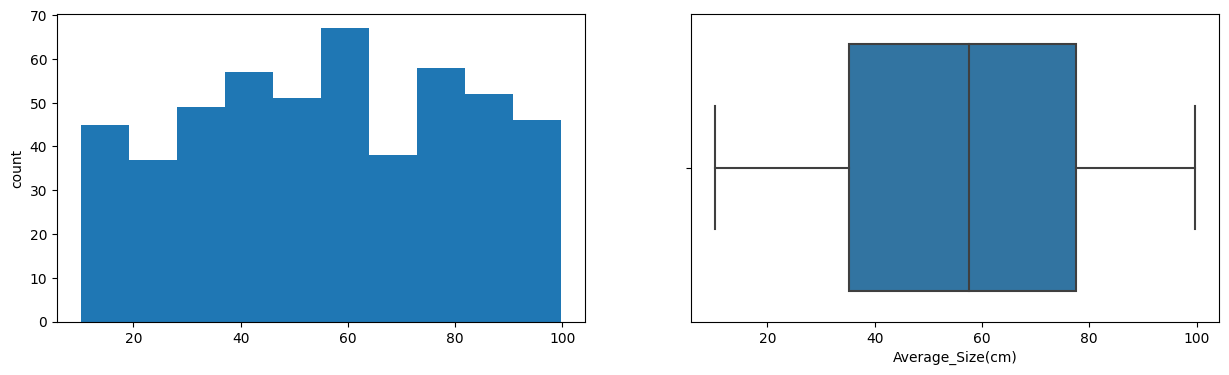

Water_Temperature(C)
Skew : -0.08


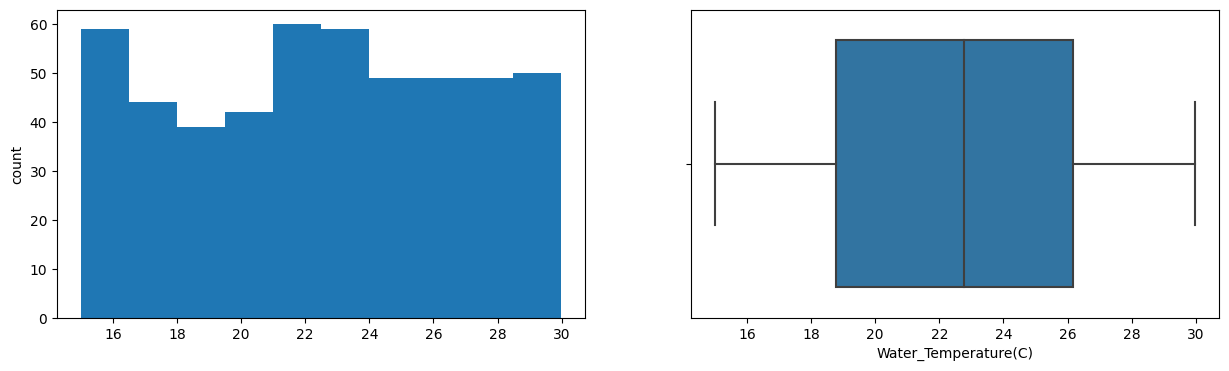

In [16]:

for col in numerical_columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

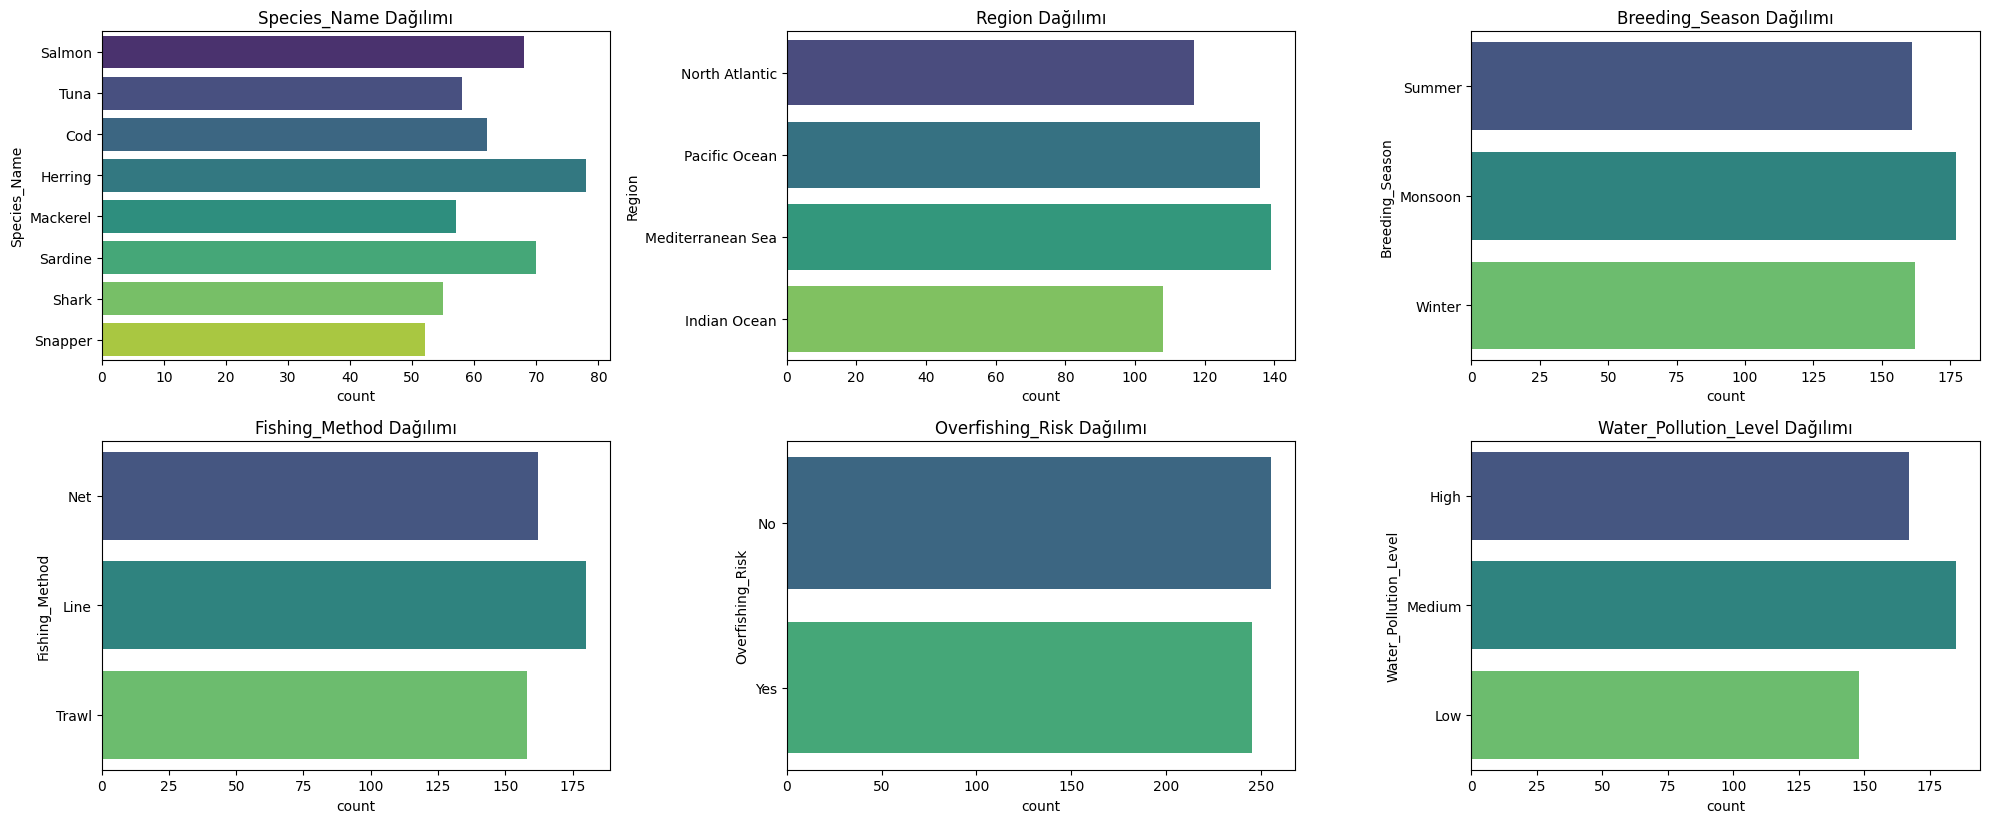

In [17]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(f'{col} Dağılımı')
plt.tight_layout()
plt.show()

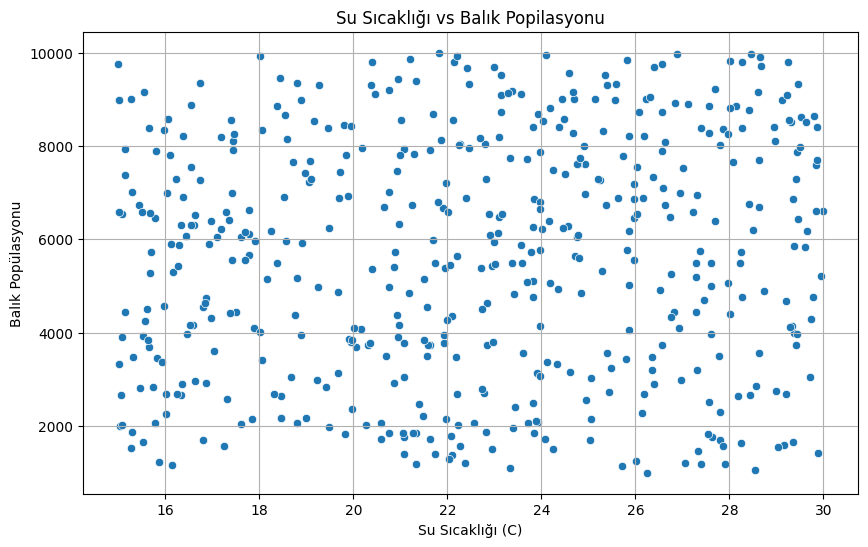

In [18]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Temperature(C)', y='Fish_Population', data=df)
plt.title('Su Sıcaklığı vs Balık Popilasyonu')
plt.xlabel('Su Sıcaklığı (C)')
plt.ylabel('Balık Popülasyonu')
plt.grid(True)
plt.show()

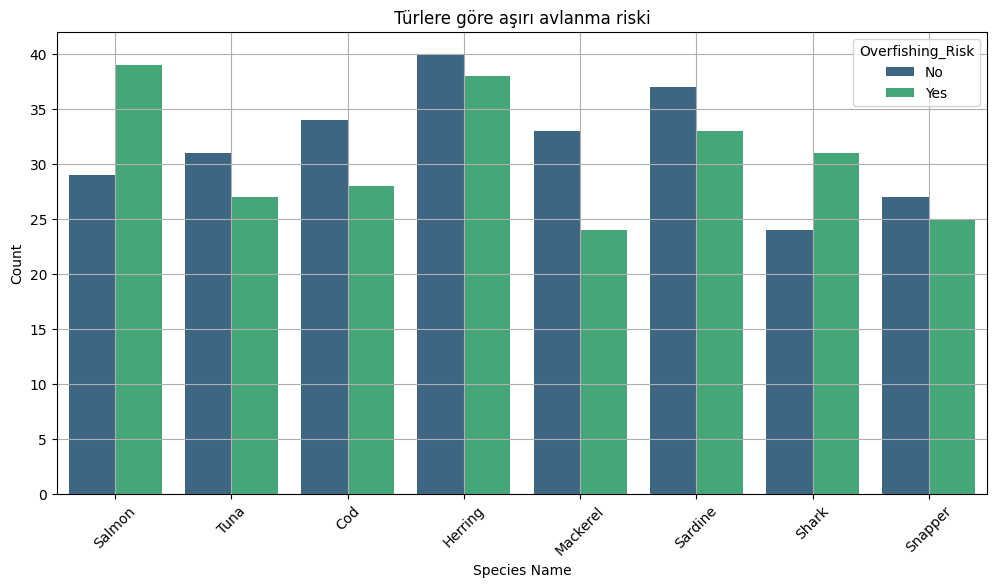

In [19]:
# Türlere göre aşırı avlanma riski
plt.figure(figsize=(12, 6))
sns.countplot(x='Species_Name', hue='Overfishing_Risk', data=df, palette='viridis')
plt.title('Türlere göre aşırı avlanma riski')
plt.xlabel('Species Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
print(df.describe())

       Fish_Population  Average_Size(cm)  Water_Temperature(C)
count       500.000000        500.000000            500.000000
mean       5628.790000         56.022960             22.552300
std        2541.521134         24.962762              4.359735
min        1004.000000         10.230000             15.000000
25%        3499.250000         35.130000             18.790000
50%        5813.000000         57.520000             22.785000
75%        7877.750000         77.462500             26.182500
max        9996.000000         99.790000             29.990000


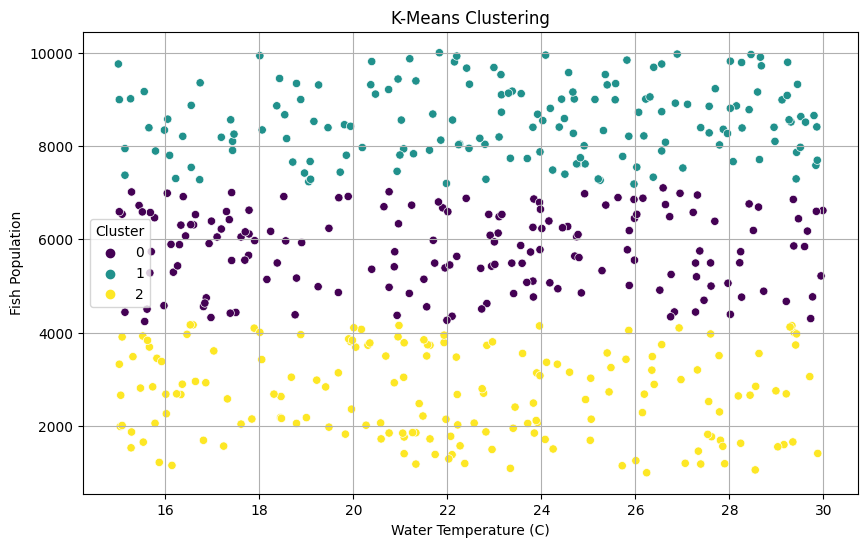

In [21]:
from sklearn.cluster import KMeans

# Sayısal verileri seçme
numeric_df = df[['Water_Temperature(C)', 'Fish_Population', 'Average_Size(cm)']]

# K-Means modelini eğitme
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(numeric_df)


# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Temperature(C)', y='Fish_Population', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Water Temperature (C)')
plt.ylabel('Fish Population')
plt.grid(True)
plt.show()

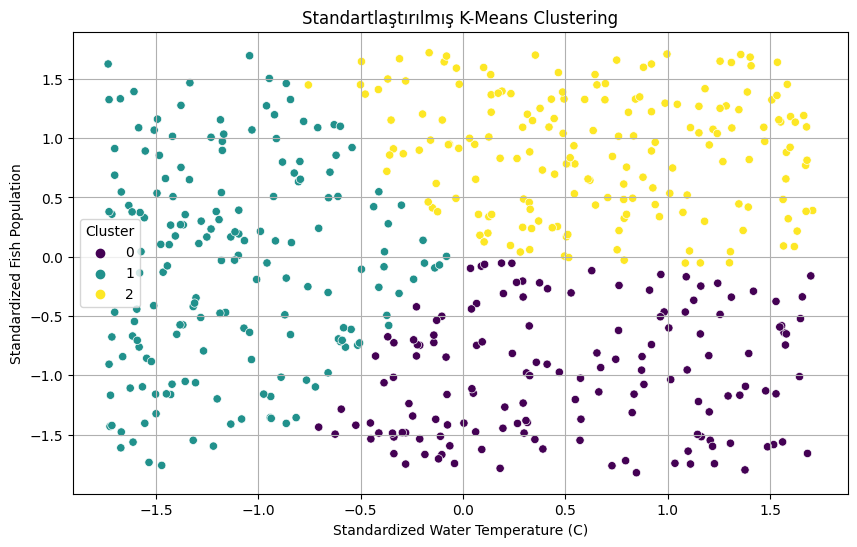

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sayısal sütunları standartlaştırma
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Water_Temperature(C)', 'Fish_Population']])

# K-Means modelini tekrar eğitme
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Standartlaştırılmış K-Means Clustering')
plt.xlabel('Standardized Water Temperature (C)')
plt.ylabel('Standardized Fish Population')
plt.grid(True)
plt.show()

In [23]:
def find_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

numeric_columns = df.select_dtypes(include=np.number).columns
outliers_dict = {col: find_outliers(df[col]) for col in numeric_columns}

for col, outliers in outliers_dict.items():
    print(f"Variable '{col}': {outliers.sum()} outliers.")

Variable 'Fish_Population': 0 outliers.
Variable 'Average_Size(cm)': 0 outliers.
Variable 'Water_Temperature(C)': 0 outliers.
Variable 'Cluster': 0 outliers.


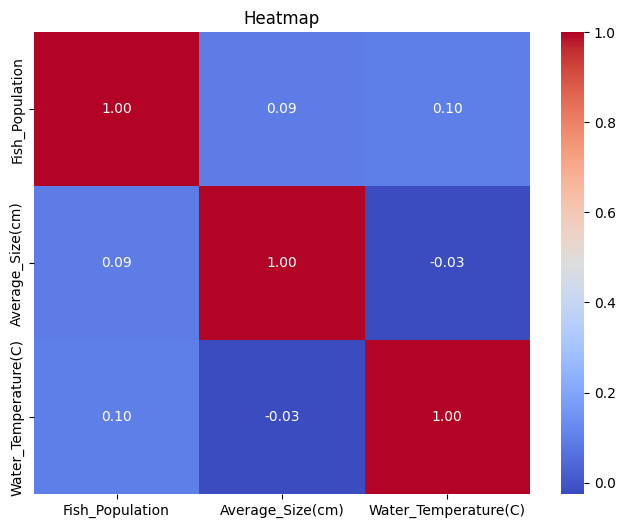

In [24]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

columns_cat = df.select_dtypes(include=['object']).columns.tolist()

df[columns_cat] = df[columns_cat].fillna(df[columns_cat].mode().iloc[0])

label_encoder = LabelEncoder()
df[columns_cat] = df[columns_cat].apply(lambda col: label_encoder.fit_transform(col))

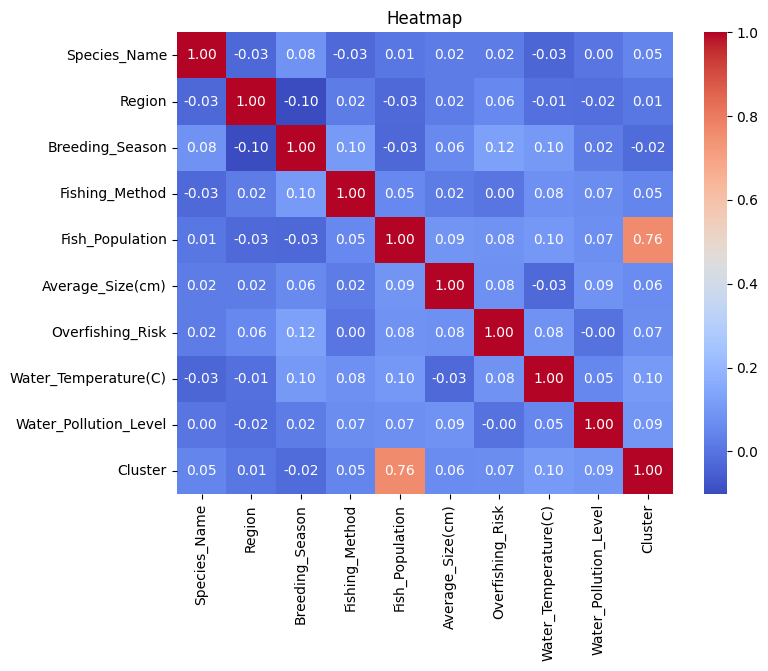

In [26]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

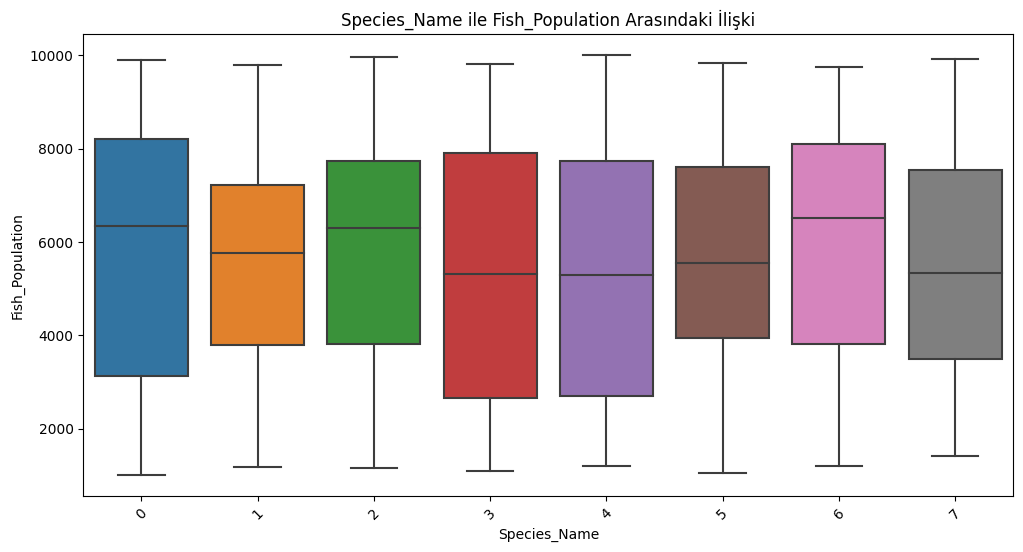

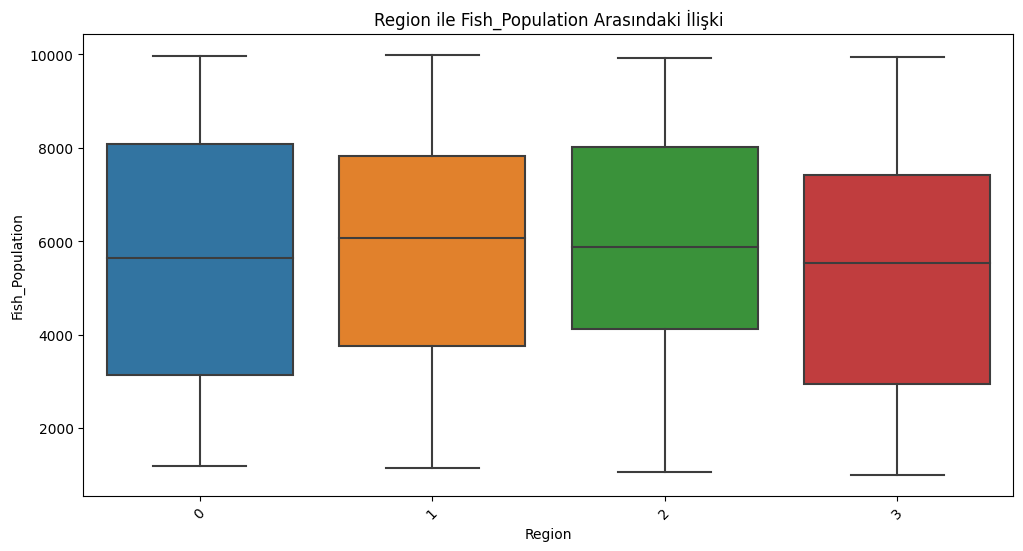

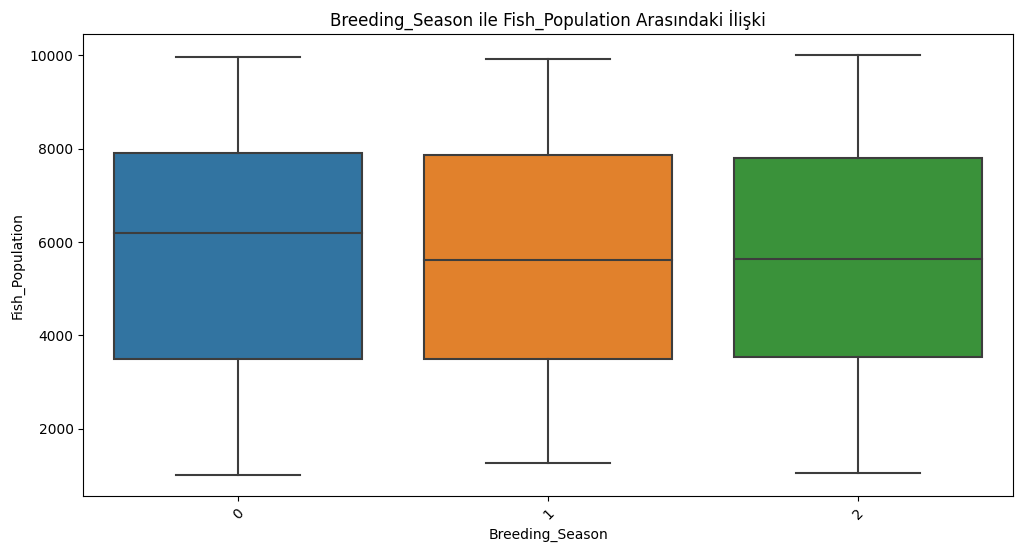

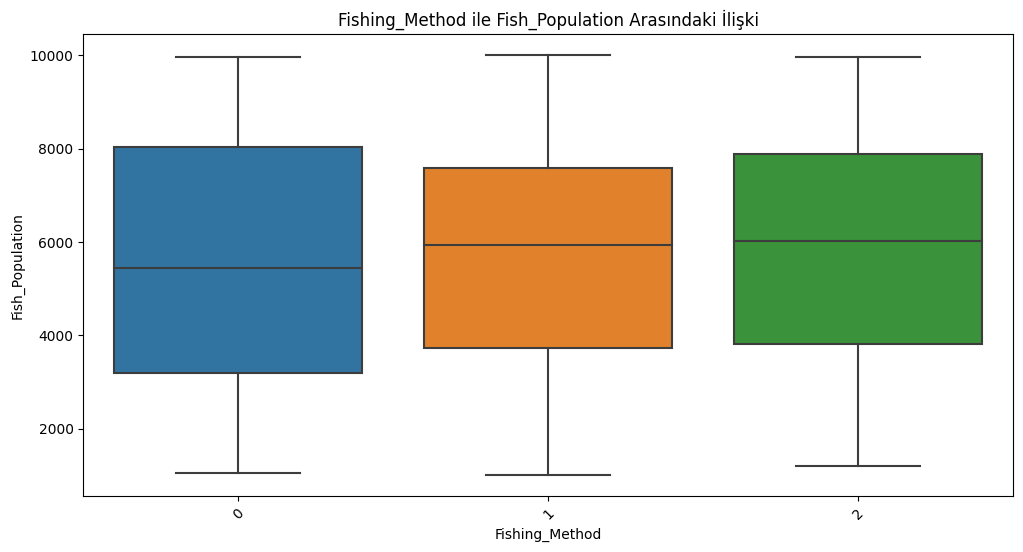

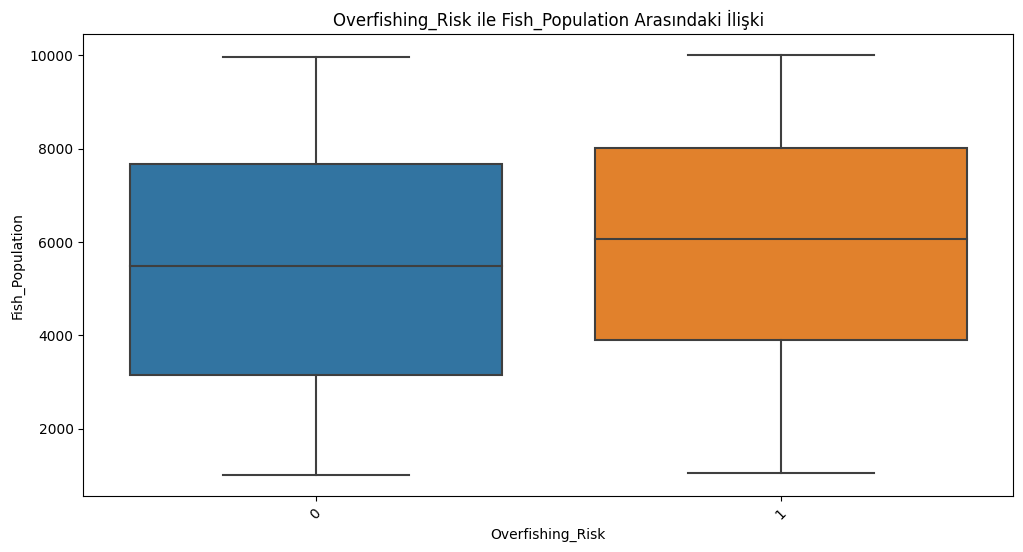

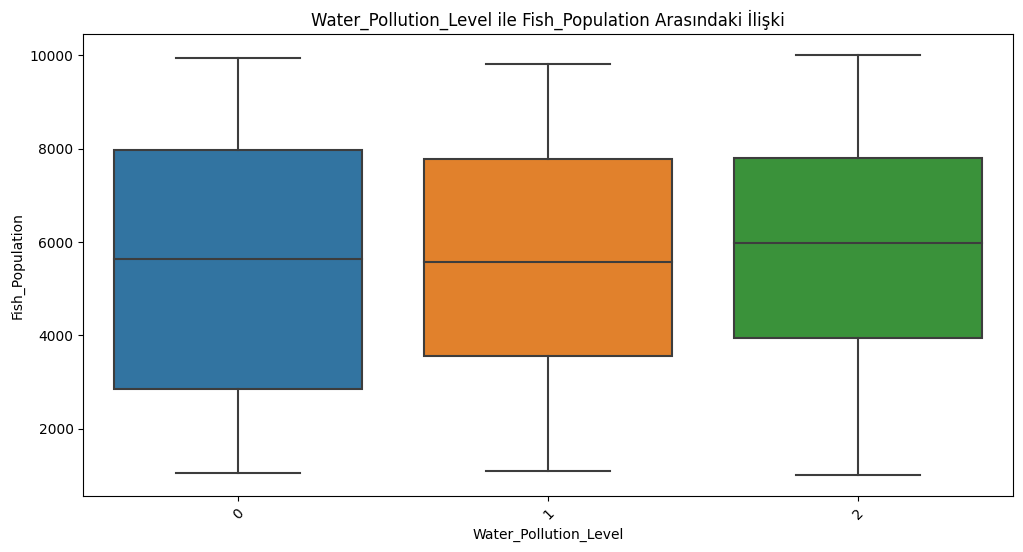

In [27]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y=numerical_columns[0], data=df)
    plt.title(f'{col} ile {numerical_columns[0]} Arasındaki İlişki')
    plt.xticks(rotation=45)
    plt.show()

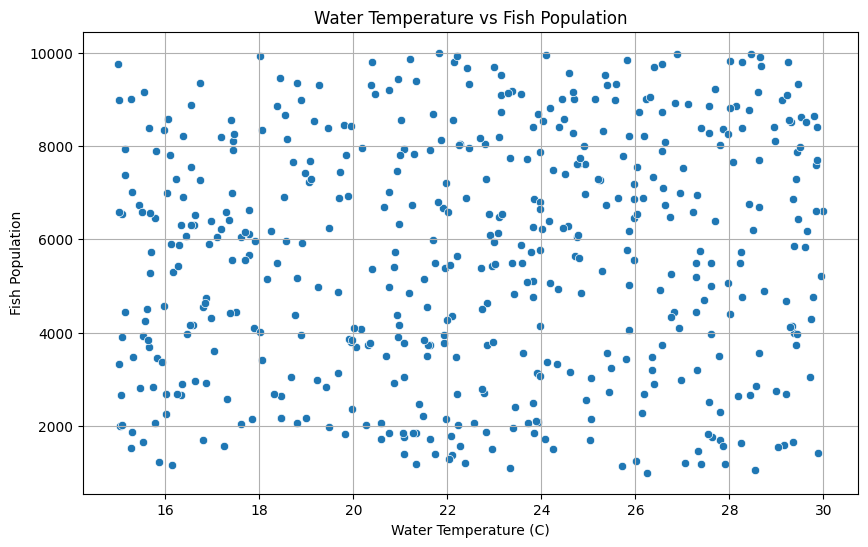

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Temperature(C)', y='Fish_Population', data=df)
plt.title('Water Temperature vs Fish Population')
plt.xlabel('Water Temperature (C)')
plt.ylabel('Fish Population')
plt.grid(True)
plt.show()

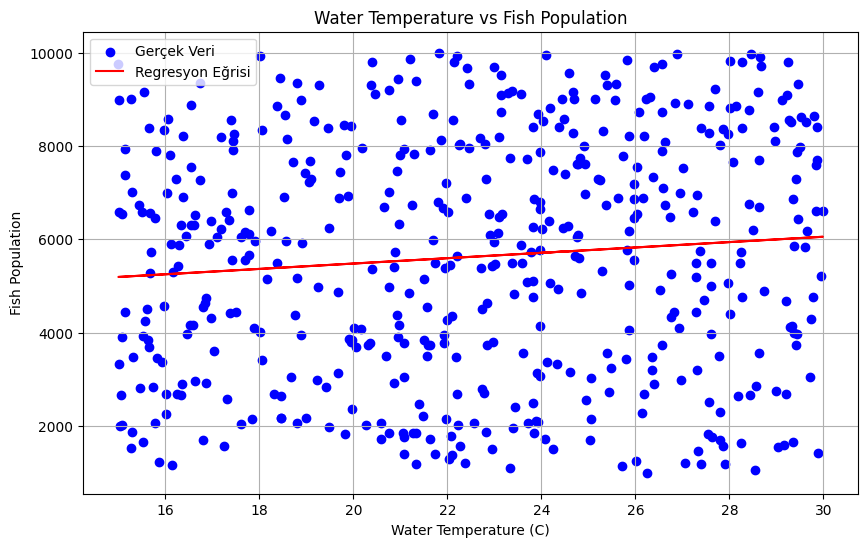

In [29]:
from sklearn.linear_model import LinearRegression

X = df[['Water_Temperature(C)']]
y = df['Fish_Population']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veri')
plt.plot(X, y_pred, color='red', label='Regresyon Eğrisi')
plt.title('Water Temperature vs Fish Population')
plt.xlabel('Water Temperature (C)')
plt.ylabel('Fish Population')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Log dönüşüm fonksiyonu
def log_transform(df, col):
    for colname in col:
        df[colname + '_log'] = np.log(df[colname] + 1)  # +1 eklenmesinin sebebi log(0)'ın tanımsız olması
    print(df.info())

# Log dönüşümünü uygulayalım
log_transform(df, ['Fish_Population', 'Water_Temperature(C)'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Species_Name              500 non-null    int64  
 1   Region                    500 non-null    int64  
 2   Breeding_Season           500 non-null    int64  
 3   Fishing_Method            500 non-null    int64  
 4   Fish_Population           500 non-null    int64  
 5   Average_Size(cm)          500 non-null    float64
 6   Overfishing_Risk          500 non-null    int64  
 7   Water_Temperature(C)      500 non-null    float64
 8   Water_Pollution_Level     500 non-null    int64  
 9   Cluster                   500 non-null    int32  
 10  Fish_Population_log       500 non-null    float64
 11  Water_Temperature(C)_log  500 non-null    float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 45.0 KB
None


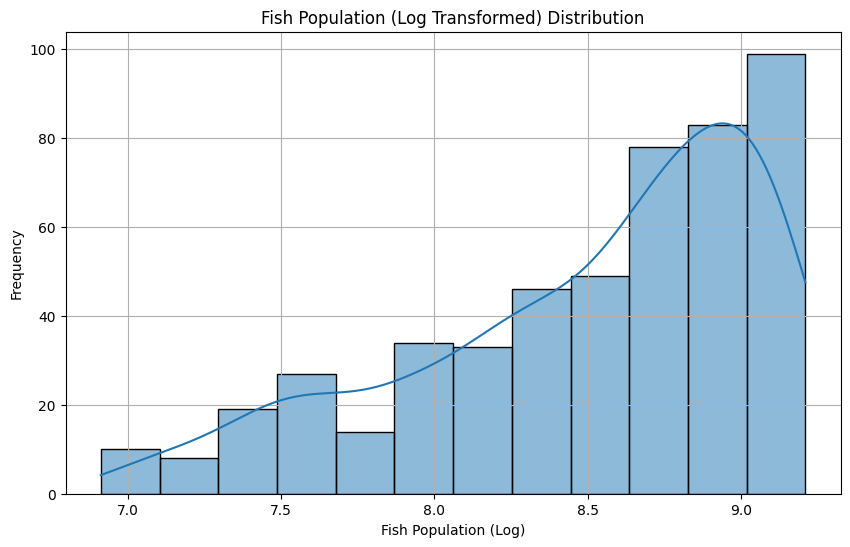

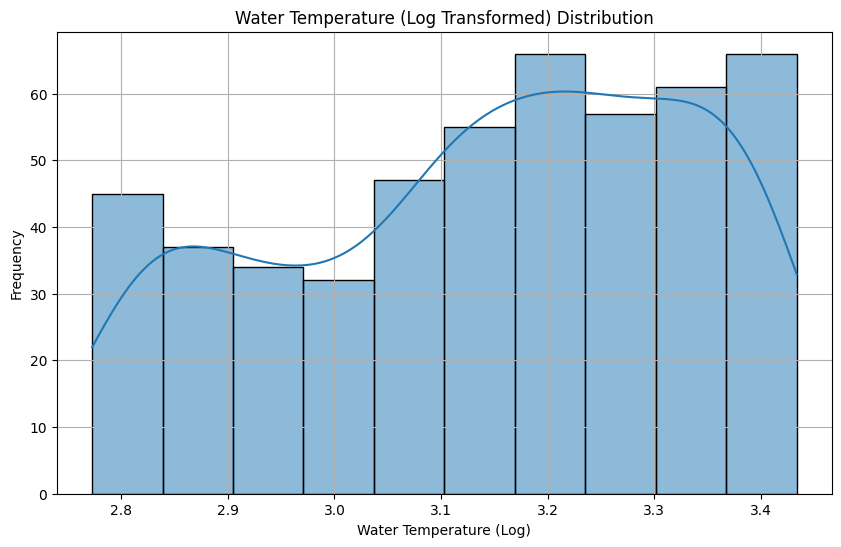

In [31]:
# Fish_Population_log dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Fish_Population_log'], kde=True)
plt.title('Fish Population (Log Transformed) Distribution')
plt.xlabel('Fish Population (Log)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Water_Temperature_log dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Water_Temperature(C)_log'], kde=True)
plt.title('Water Temperature (Log Transformed) Distribution')
plt.xlabel('Water Temperature (Log)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


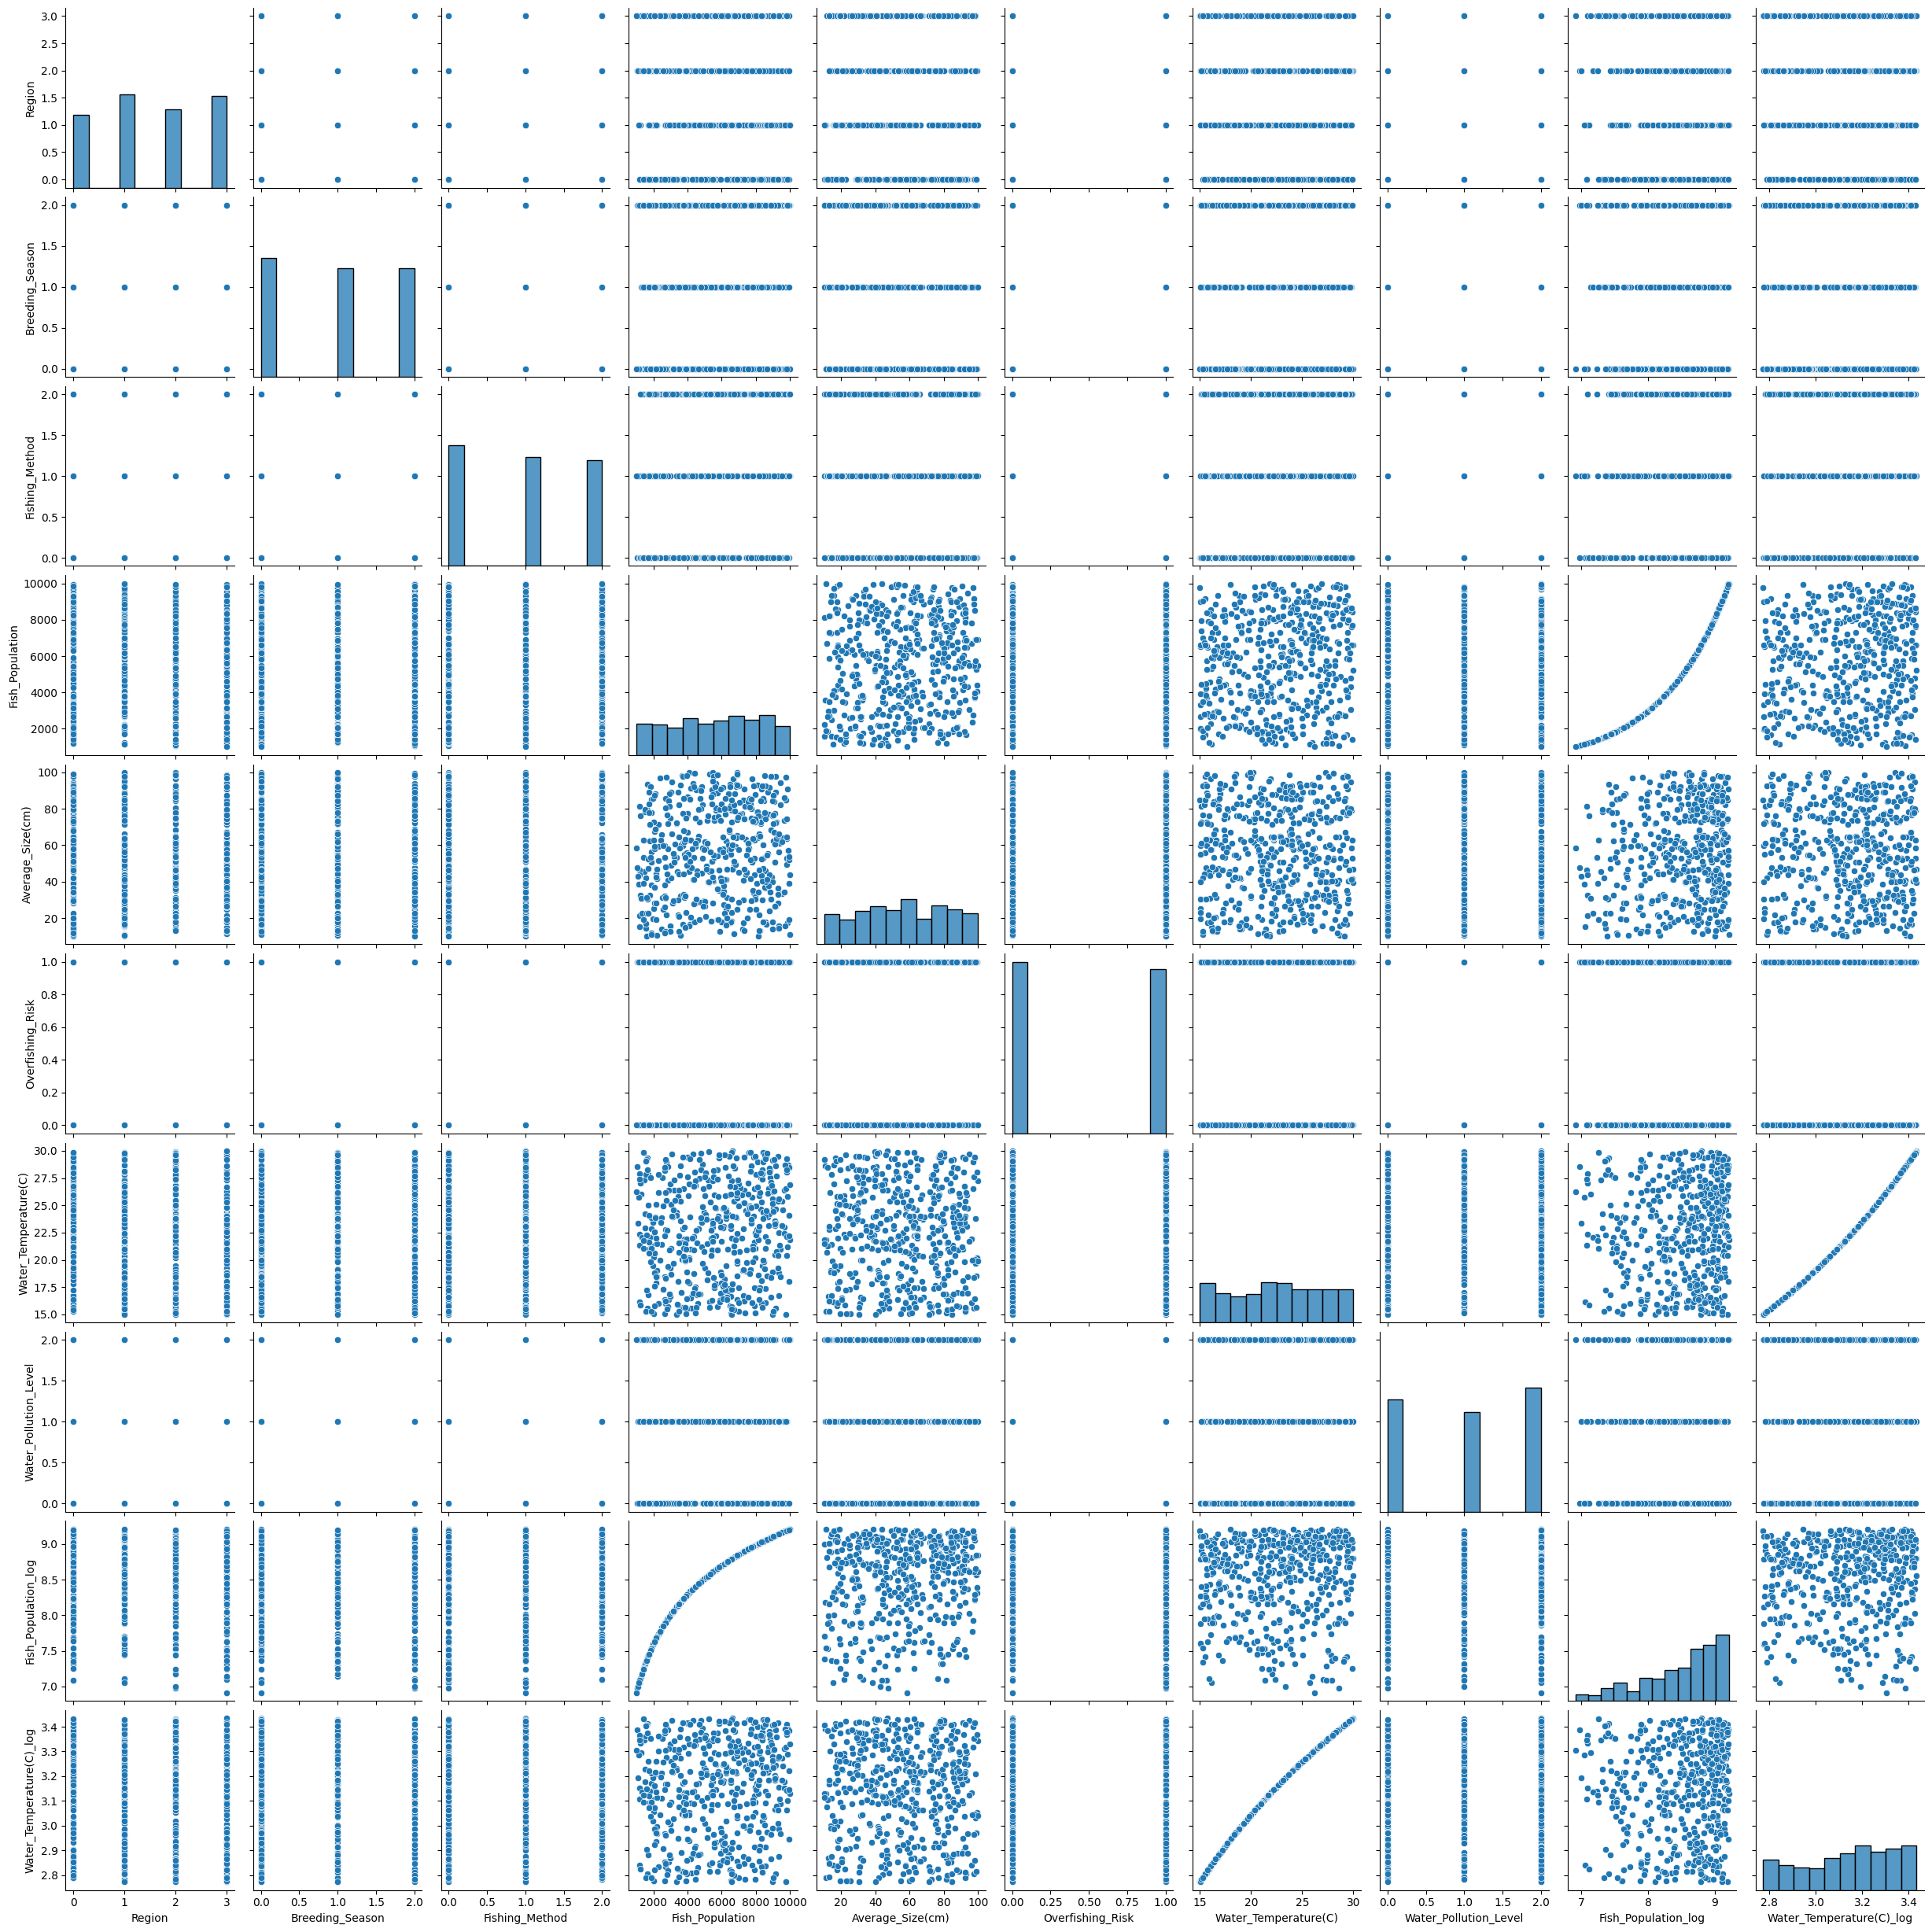

In [32]:
# Gereksiz sütunları veri setinden çıkarma
df_dropped = df.drop(['Species_Name', 'Cluster'], axis=1)

# Pairplot oluşturma
sns.pairplot(df_dropped)
plt.show()